<a href="https://colab.research.google.com/github/wcrowley342/DataCamp_CustomerSegmentation/blob/main/Data_Camp_Customer_Segmentation_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://learn.datacamp.com/courses/customer-segmentation-in-python

The most successful companies today are the ones that know their customers so well that they can anticipate their needs. Data analysts play a key role in unlocking these in-depth insights, and segmenting the customers to better serve them. In this course, you will learn real-world techniques on customer segmentation and behavioral analytics, using a real dataset containing anonymized customer transactions from an online retailer. You will first run cohort analysis to understand customer trends. You will then learn how to build easy to interpret customer segments. On top of that, you will prepare the segments you created, making them ready for machine learning. Finally, you will make your segments more powerful with k-means clustering, in just few lines of code! By the end of this course, you will be able to apply practical customer behavioral analytics and segmentation techniques.

# Cohort Analysis

*   http://www.gregreda.com/2015/08/23/cohort-analysis-with-python/
https://medium.com/swlh/
*   https://supermetrics.com/blog/analyze-user-behavior-in-depth-cohort-analysis?utm_source=google&utm_medium=cpc&utm_campaign=supermetrics-googledatastudio&utm_adgroup=datastudio-dsa&utm_category=search-nonbrand&utm_term=&location=&gclid=CjwKCAjwr56IBhAvEiwA1fuqGiQuHIMxjq3h7jjCfK4tWK5iJmjGBVSdgiAK3I5siafh-Qic0LGKghoCBbAQAvD_BwE
*   https://www.countants.com/blogs/how-cohort-analysis-works-for-marketing-agencies/
https://www.moengage.com/blog/
*   https://expressanalytics.com/resources/topics/marketing-analytics/heres-how-cohort-analysis-can-boost-your-marketing-efforts/

 Dictionary definition of a cohort is a group of people with some common characteristics

Pretty destinct breakdown between purchase/acquisitional (uber/airbnb) cohort analyses and behavior/usage (cohort analyses)

Cohort analysis can be helpful when it comes to understanding your business’ health and "stickiness" - the loyalty of your customers. Can also be a good indicator of "product market fit"

The analysis technique is to look into a specific metric for a specific cohort to understand how that metric performs over time.

**cohort analysis vs segmentation**

https://www.talkinsaasy.com/blog/segment-vs-cohort
https://webengage.com/blog/cohort-analysis/ 

 Customers can be segmented into groups based on certain shared commonalities, the most basic being demography. The RFM model, Recency, Frequency, and Monetary analysis is a popular segmentation method.

A cohort, on the other hand, is a slightly more focused group of customers having the same characteristic. It’s akin to putting “similar” clients in a bucket.

+++
For two users to be part of the same cohort, they have to be bound by the commont event AND time period; to create a segment you could use almost any condition as a basis for segmentation

A cohort is a subset of a segment


+++++++

Cohort analysis can help you measure retention or net revenue retention

Segments are groups of customers that share similar characteristic that IS NOT the first month they became a customer. This characteristic could be anything from customer size, industry, MRR, location, etc. Segmentation can help you identify your ideal customer profile (by comparing segments on metrics like LTV, MRR, etc)



**Types of cohorts**
*   Time cohorts
*   Behavior cohorts (groups them by type of product/service)
*   Size cohorts (grouped based on order amount typically)



**Elements of cohort analysis**
*   Pivot tables
*   Rows - cohorts
*   Columns - time periods (since acquisition)
*   Metrics (in the table) - number of customers in the cohort



**Time cohorts**

Grouping customers based on time since an activity, such as month since acquisition

Helps you understand "retention rates"

In [9]:
#import data: https://archive.ics.uci.edu/ml/datasets/online+retail# , .5 Million

import pandas as pd
import numpy as np
import datetime as dt
from datetime import timedelta


online = pd.read_csv("/content/Online Retail.csv")
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [1]:
#assign acquisition month cohort

#define function that truncates date to first day of month

def get_month(x): return dt.datetime(x.year, x.month, 1)

#create invoice month column

online['InvoiceMonth'] = online['InvoiceDate'].apply(get_month)

#create group by object by invoice month

grouping = online.groupby('CustomerID')['InvoiceMonth']

#assign smallest invoice month value to each customer, thereby assigning cohort to each customer 

online['CohortMonth'] = grouping.transform('min')

NameError: ignored

**Cohort Metrics**



In [ ]:
#Retention rate; ratio of how many customers came back in subsequent month (first month/column is always 100%)

#store the first column as cohort_sizes
cohort_sizes = cohort.counts.iloc[:,0]

#Divide all values on the cohorts_counts table by cohort sizes
retention = cohort_counts.divide(cohort_sizes, axis = 0)

#review the retention table (rounded to 3 digits)

retention.round(3) * 100


**Visualize Cohort Analysist** (with heatmaps)



*   Easiest way to visualize cohort analysis
*   Combines both data and visuals
*   Can be created with just a few lines of code from seaborn



NameError: ignored

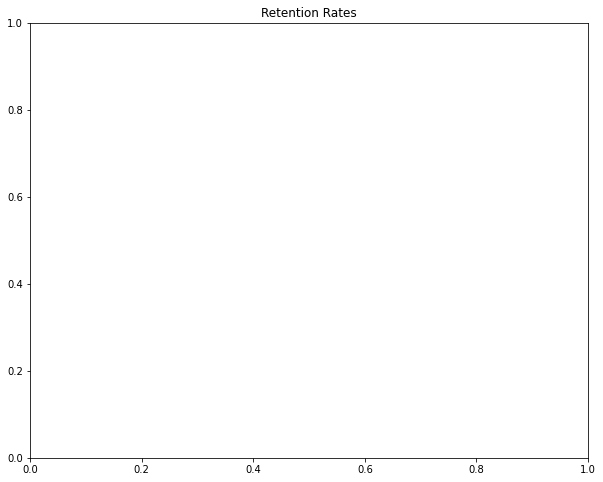

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 8))
plt.title('Retention Rates')
sns.heatmap(data = retention, 
            annot = True,
            fmt = '.0%',
            vmin = 0.0,
            vmax = 0.5,
            cmap = 'BuGn')

plt.show

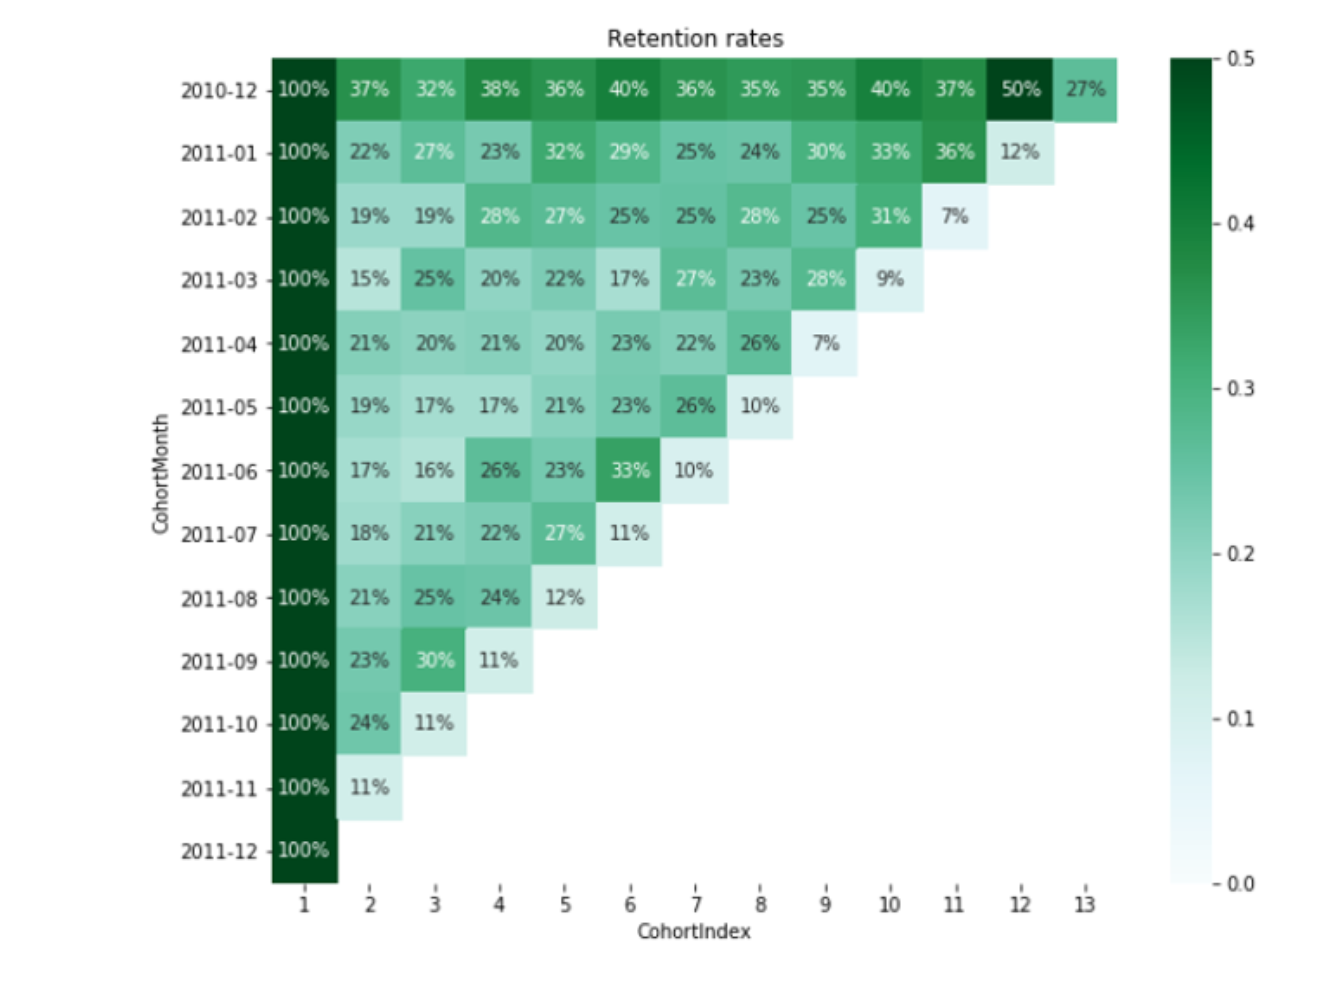

# Recency, Frequency, Monetary Value analysis


Other Notes

RFM analysis can help you provide more targeted marketing efforts to those customers most likely to purchase/convert 

Thinking about segmenting your various customers (and possible campaigns) by RFM


https://www.youtube.com/watch?v=YgRq7fW5QrM


Course Notes

Elements 

*   Recency (R) - how recently they purchased / days since last transaction/ lower the better
*   Frequencey (F) - how many purchases / higher the better /# of transactions in last 12 mos
*   Monetary (M) - how much money spent in 12 / higher the better 

How to split / group:

*   Percentiles, quantiles
*   Pareto, 80/20 cut
*   Custom, based on business knowledge 

Steps for grouping by percentiles:

1.   Sort customers based on that metrics
2.   Break them into a number of equal sized groups
3.   Assing a label to each group



In [ ]:
#calculate percentiles

spend_quartiles = pd.qcut(data['Spend'], q=4, labels=range(1,5))
#add column to data frame
data['Spend_Quartile'] = spend_quartiles
#sort by values
data.sort_values('Spend_Quartile')

note, when assigning labels, higher is not always better. 

**Assigning Custom Labels**

In [ ]:
#assigning custom labels

r_labels = ['Active','Lapsed', 'Inactive', 'Churned']

recency_quartiles = pd.qcut(data['Recency_Days'], q=4, labels=r_labels)
#create new column and add it to data frame
data['Recency_Quartile'] = recency_quartiles
#sort by values
data.sort_values('Recency_Days')

In [2]:
import pandas as pd
import numpy as np


online = pd.read_csv("/content/Online Retail.csv")
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom


**Calculating RFM Metrics**




In [4]:
#create hypothetical snapshot day

snapshot_date = max(online.InvoiceDate)+datetime.timedelta(days=1)

TypeError: ignored

In [5]:
#aggregate data on a customer level

datamart = online.groupby([CustomerID']).agg({
  'InvoiceDate": lambda x: (snapshot_date - x.max()).days, 
  'InvoiceNo':'count',
  'TotalSum': 'sum'})
})

SyntaxError: ignored

In [6]:
#rename columns for easier interpretation
datamart.rename(columns = {'InvoieDate': 'Recency', 
                           'InvoiceNo': 'Frequency',
                           'TotalSum': 'MonetaryValue'}, inplace=True)

NameError: ignored

**Building RFM Segments**

**Build RFM Segment and RFM Score**


In [ ]:
#function to concatenate RFM quartile values, and then sum them up for a single score

def join_rfm(x): return str(x['R']) + str(x['F']) + str(x['M'])



In [8]:
#filtering on RFM segments

#select bottom right and get first 5


datamart[datamart['RFM_Segment']=='111'][:5]

NameError: ignored

**Grouping into named segments**

In [ ]:
#use RFM score to group customers into Gold, Silver, and Bronze Segments

def segment_me(df):
  if df['RFM_Score'] >= 9:
    return 'Gold'
  elif (df['RFM_Score'] >=5) and (df['RFM_Score'] < 9):
    return 'Silver'
  else:
    return 'Bronze')

#create varialbe general segment

datamart['General_Segment'] = datamart.apply(segment_me, axis=1)
datamart.groupby('General_Segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count']}).round(1)
})

# Data pre-processing for clustering


# Customer Segmentation with K-means
